In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import IPython.display as display
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
file_path = "attacks.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [3]:
df.columns = df.columns.str.strip()
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [4]:
# Initial Data Exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nBasic Info:")
print(df.info())

Dataset Shape: (25723, 24)

Column Names: Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity 

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst Few Rows:")
df.head()


Missing Values:
Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

First Few Rows:


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
categorical_columns = ['Sex', 'Country', 'Activity', 'Fatal (Y/N)', 'Species']
for col in categorical_columns:
    print(f"\n🔹 Unique values in '{col}':\n", df[col].unique())


🔹 Unique values in 'Sex':
 ['F' 'M' nan 'M ' 'lli' 'N' '.']

🔹 Unique values in 'Country':
 ['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' nan 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, British overseas territory'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'FIJI' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE'
 'ST. MARTIN' 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES'
 'GUAM' 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA'
 'CROATIA' 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA'
 'TURKS & CAICOS' 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA'
 'MALTA' 'VIETNAM' 'M

In [7]:
# Drop Irrelevant Columns
columns_to_drop = ['Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'pdf', 'href formula', 'href']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Remove Duplicate
df = df.drop_duplicates(subset=['Date', 'Country', 'Activity', 'Species'], keep='first')

In [8]:
# Convert Date to Proper Format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.dropna(subset=['Date'])

# Extract Month and Season from Date
df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

all_months = np.arange(1, 13)
month_counts_fixed = df['Month'].value_counts().reindex(all_months, fill_value=0)

# Convert Year to Integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

In [9]:
# Standardize Text Columns
df['Sex'] = df['Sex'].str.upper().str.strip()
df['Country'] = df['Country'].str.title().str.strip()
df['Activity'] = df['Activity'].str.lower().str.strip()

In [10]:
# Drop rows where critical columns are missing
df = df.dropna(subset=['Year', 'Country', 'Fatal (Y/N)', 'Activity'])

# Fill missing values with appropriate methods
df['Age'] = df['Age'].fillna(df['Age'].mode()[0] if not df['Age'].mode().empty else "Unknown")
df['Time'] = df['Time'].fillna("Unknown")
df['Species'] = df['Species'].fillna("Unknown species")

In [11]:
# Remove unrealistic values (keeping only years >= 1900 and <= 2025)
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2025)]

# Clean the Fatal (Y/N) Column
# Standardize values to only 'Y', 'N', or 'Unknown'
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.upper().str.strip()  # Convert to uppercase and remove spaces

# Replace non-standard values
valid_fatal_values = ['Y', 'N']
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lambda x: x if x in valid_fatal_values else "Unknown")

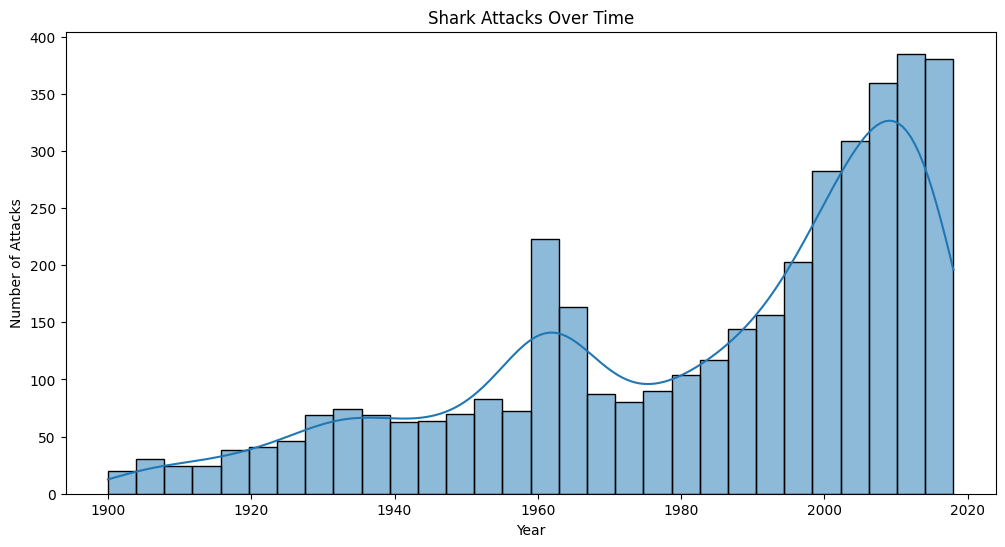

In [12]:
# Attack Trends Over Time
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'].dropna(), bins=30, kde=True)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Over Time")
plt.show()

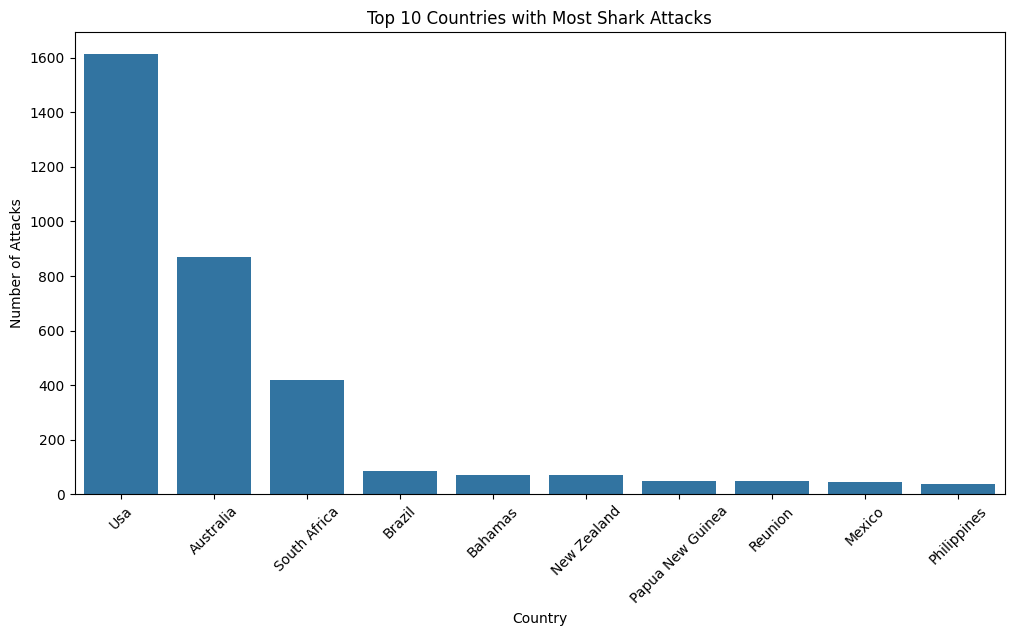

In [13]:
# Most Affected Countries
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Countries with Most Shark Attacks")
plt.show()

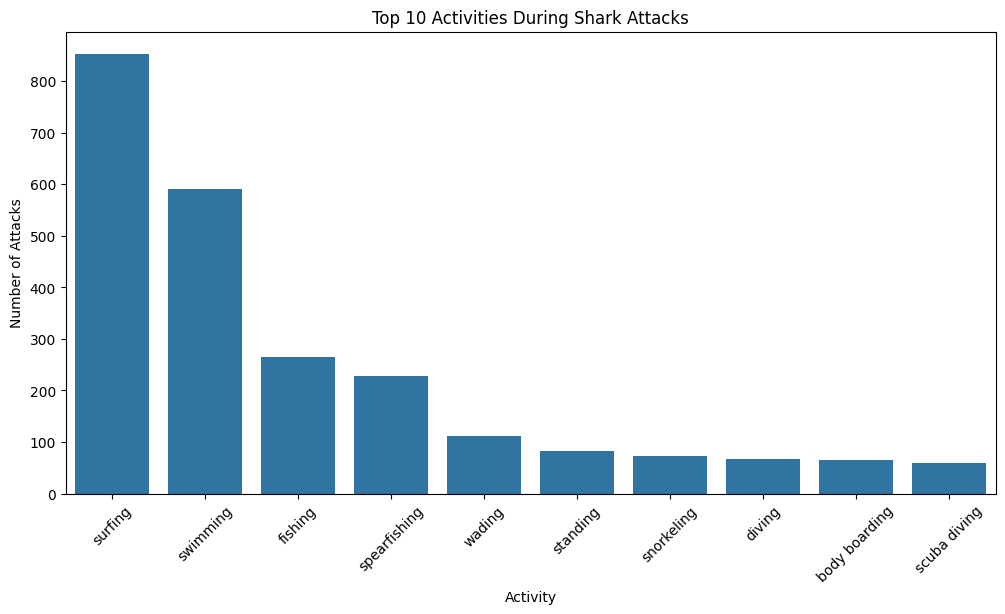

In [14]:
# Most Common Activities at the Time of Attack
plt.figure(figsize=(12, 6))
top_activities = df['Activity'].value_counts().head(10)
sns.barplot(x=top_activities.index, y=top_activities.values)
plt.xticks(rotation=45)
plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Activities During Shark Attacks")
plt.show()

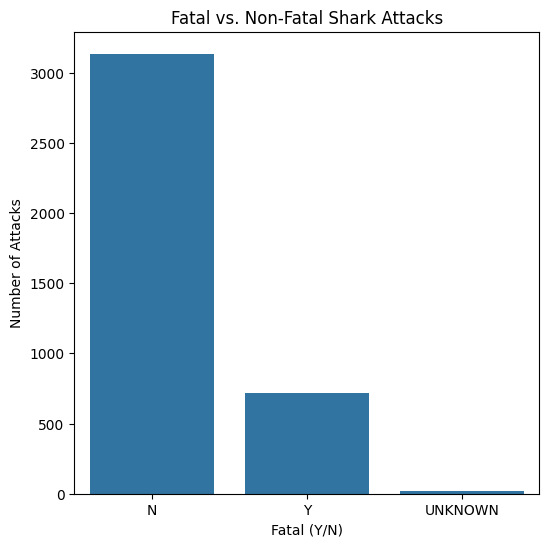

In [15]:
# Fatal vs. Non-Fatal Attacks
plt.figure(figsize=(6, 6))
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.upper().str.strip()
fatal_counts = df['Fatal (Y/N)'].value_counts()
sns.barplot(x=fatal_counts.index, y=fatal_counts.values)
plt.xlabel("Fatal (Y/N)")
plt.ylabel("Number of Attacks")
plt.title("Fatal vs. Non-Fatal Shark Attacks")
plt.show()

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\312582150.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129416 (\N{SHARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


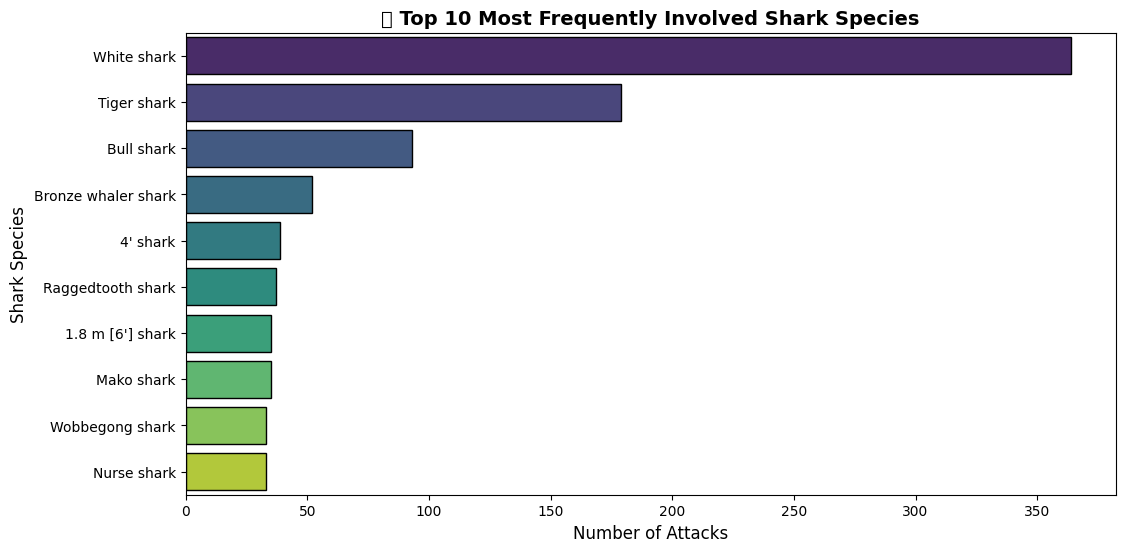

In [16]:
import re

# Standardize Column Names
df.rename(columns=lambda x: x.strip(), inplace=True) 

# Handle Missing Values by Replacing with "Unidentified Shark"
df['Species'] = df['Species'].fillna("Unidentified Shark")

# Extract Shark Species
shark_pattern = r'.*?\b(shark|Shark)\b' 

def extract_shark_species(text):
    match = re.search(shark_pattern, text)
    return match.group() if match else "Shark type unconfirmed"

df['Extracted Species'] = df['Species'].apply(extract_shark_species)

# Count the Occurrence of Each Shark Species
species_counts = df['Extracted Species'].value_counts().reset_index()
species_counts.columns = ['Shark Species', 'Number of Attacks']

# Filter Top 10 Most Frequent Species (Excluding Unknown Cases)
valid_species = species_counts[~species_counts['Shark Species'].isin(["Unidentified Shark", "Shark type unconfirmed"])]
top_10_species = valid_species.head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_species['Number of Attacks'], 
    y=top_10_species['Shark Species'], 
    palette="viridis", 
    edgecolor="black"
)
plt.xlabel("Number of Attacks", fontsize=12)
plt.ylabel("Shark Species", fontsize=12)
plt.title("🦈 Top 10 Most Frequently Involved Shark Species", fontsize=14, fontweight="bold")

plt.show()

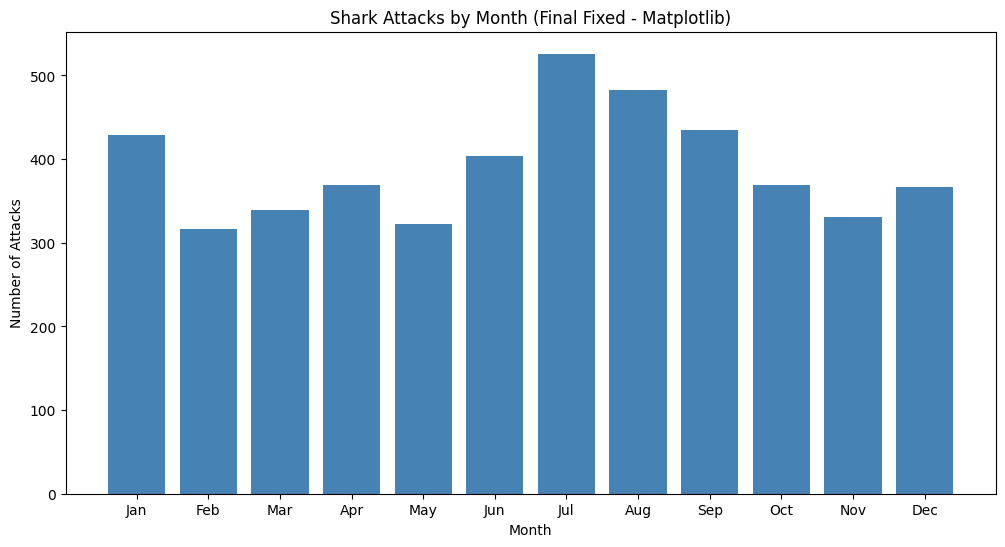

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(all_months, month_counts_fixed.values, color='steelblue')

# Ensure correct month labels
plt.xticks(all_months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Month (Final Fixed - Matplotlib)")

plt.show()

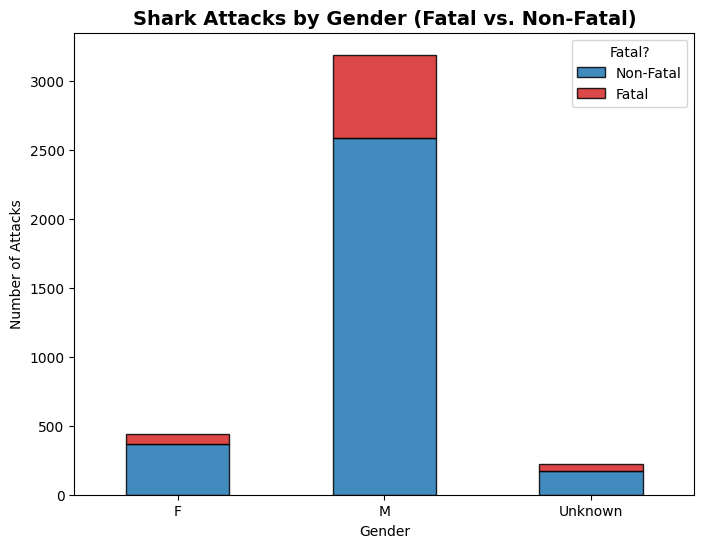

In [18]:
df['Sex'] = df['Sex'].str.upper().str.strip()  # Convert to uppercase & remove spaces
    
# Replace non-standard values with "Unknown"
df['Sex'] = df['Sex'].apply(lambda x: x if x in ['M', 'F'] else 'Unknown')

# Step 2: Count Fatal vs Non-Fatal Attacks by Gender
gender_fatality = df.groupby('Sex')['Fatal (Y/N)'].value_counts().unstack().fillna(0)

# Step 3: Correctly Map Columns to Colors
fig, ax = plt.subplots(figsize=(8, 6))
gender_fatality[['N', 'Y']].plot(kind='bar', stacked=True, color=["#1f77b4", "#d62728"], edgecolor='black', alpha=0.85, ax=ax)

# Step 4: Fix Legend
ax.legend(["Non-Fatal", "Fatal"], title="Fatal?", loc="upper right")

# Step 5: Improve Labels & Title
plt.xlabel("Gender")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Gender (Fatal vs. Non-Fatal)", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)

plt.show()

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\2981980319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")


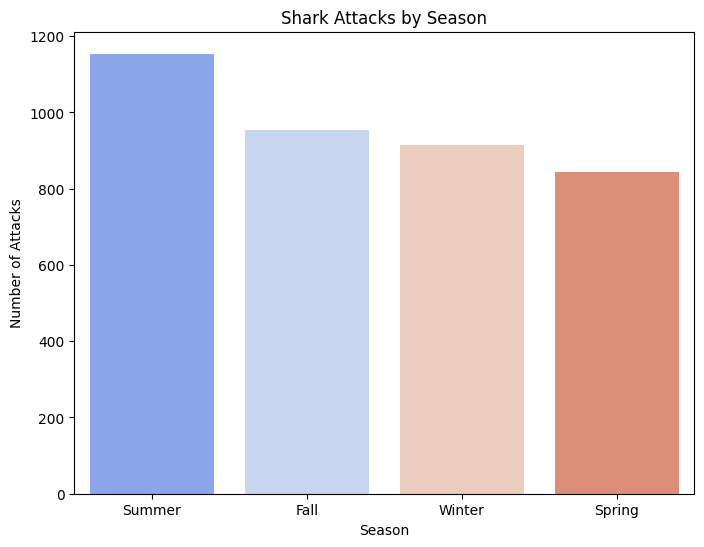

In [19]:
# Shark Attacks by Season
plt.figure(figsize=(8, 6))
season_counts = df['Season'].value_counts()
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Season")
plt.show()

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\2679203744.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values, palette="viridis")


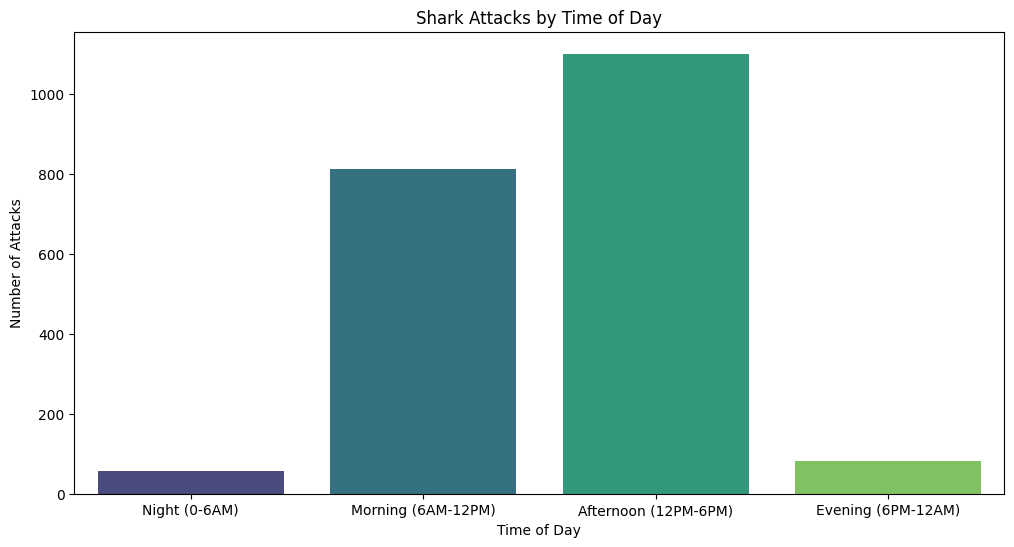

In [20]:
# Shark Attacks by Time of Day
plt.figure(figsize=(12, 6))
df['Time'] = df['Time'].astype(str).str[:2]  # Extracting first two characters (hour)
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
time_bins = [0, 6, 12, 18, 24]
time_labels = ["Night (0-6AM)", "Morning (6AM-12PM)", "Afternoon (12PM-6PM)", "Evening (6PM-12AM)"]
df['Time Period'] = pd.cut(df['Time'], bins=time_bins, labels=time_labels, include_lowest=True)

time_counts = df['Time Period'].value_counts().reindex(time_labels)
sns.barplot(x=time_counts.index, y=time_counts.values, palette="viridis")
plt.xlabel("Time of Day")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Time of Day")
plt.show()

In [21]:
# Count shark attacks per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create an enhanced choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Attack Count",
    title="🌍 Shark Attacks by Country",
    color_continuous_scale="YlOrRd",
    hover_data={'Country': True, 'Attack Count': True},
)

fig.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="white"),
    font=dict(family="Arial", size=14),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

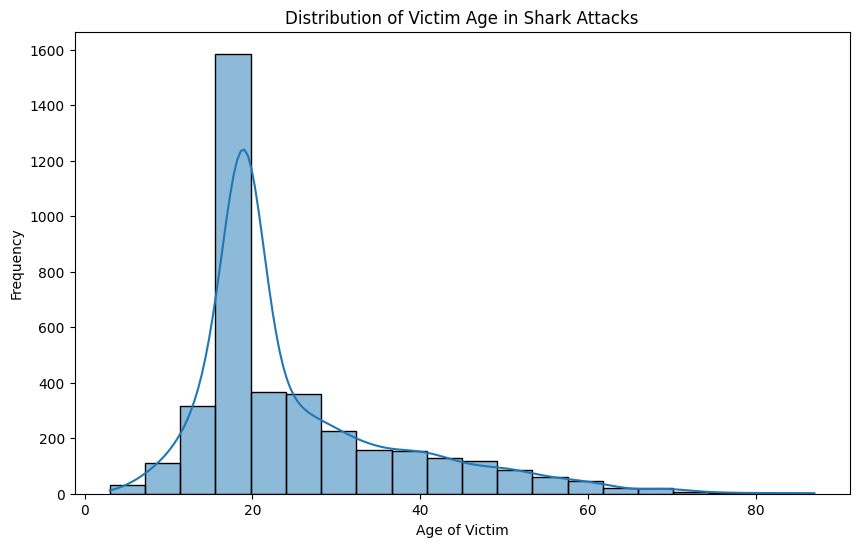

In [22]:
# Distribution of Victim Age
plt.figure(figsize=(10, 6))
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.xlabel("Age of Victim")
plt.ylabel("Frequency")
plt.title("Distribution of Victim Age in Shark Attacks")
plt.show()

c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



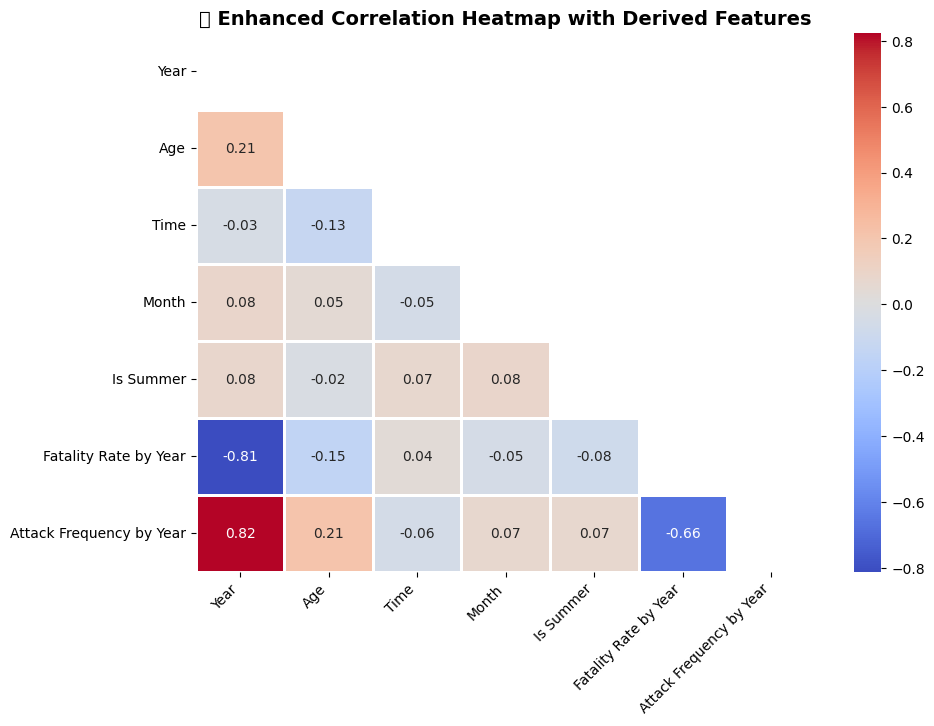

In [23]:
# Create New Derived Features
df['Is Summer'] = df['Month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

# Calculate yearly fatality rate
fatality_rate_per_year = df.groupby('Year')['Fatal (Y/N)'].apply(lambda x: (x == 'Y').mean())
df = df.merge(fatality_rate_per_year.rename("Fatality Rate by Year"), on="Year", how="left")

# Calculate yearly attack frequency
attack_count_per_year = df.groupby('Year').size()
df = df.merge(attack_count_per_year.rename("Attack Frequency by Year"), on="Year", how="left")

# Step 2: Select Numeric Columns
numeric_cols = ['Year', 'Age', 'Time', 'Month', 'Is Summer', 'Fatality Rate by Year', 'Attack Frequency by Year']
df_numeric = df[numeric_cols].dropna()  # Drop missing values

# Step 3: Compute Correlation Matrix
corr_matrix = df_numeric.corr()

# Step 4: Plot Improved Heatmap
plt.figure(figsize=(10, 7))  # Bigger size for clarity
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle for readability
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, mask=mask)

# Step 5: Improve Labels & Title
plt.title("🔥 Enhanced Correlation Heatmap with Derived Features", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

## Strong Negative Correlation (-0.81) Between Year and Fatality Rate by Year

What it means: As the years go by, the fatality rate of shark attacks is decreasing.
Why? This could indicate better medical response, improved safety measures, or changes in human behavior.

## Strong Positive Correlation (+0.82) Between Year and Attack Frequency by Year

What it means: The number of shark attacks per year has been increasing over time.
Why? This could be due to increased human presence in the ocean, climate changes, or better reporting.

## Moderate Negative Correlation (-0.66) Between Fatality Rate by Year and Attack Frequency by Year

What it means: Years with more shark attacks tend to have a lower fatality rate.
Why? Possibly because not all shark attacks are deadly, and more frequent attacks could mean less severe encounters.

## Weak or No Correlation for Is Summer and Month

What it means: Seasonality doesn’t strongly impact the number of fatal attacks.
Why? Attacks might happen more in summer, but the fatality rate is not affected.

##  Weak Correlation Between Age and Year (+0.21)

What it means: Over time, there may have been slight changes in the age demographics of attack victims, but it’s not a strong trend.

In [24]:
# Select Relevant Columns for Modeling
features = ['Year', 'Age', 'Month', 'Time', 'Country', 'Activity', 'Species', 'Is Summer']
target = 'Fatal (Y/N)'

# Keep only necessary columns
df_model = df[features + [target]].copy()

# Handle Missing Values
df_model['Age'].fillna(df_model['Age'].median(), inplace=True)  # Fill missing Age with median
df_model['Time'].fillna(df_model['Time'].mode()[0], inplace=True)  # Fill missing Time with most frequent value
df_model.fillna("Unknown", inplace=True)  # Fill other categorical missing values with "Unknown"

# Convert Categorical Data into Numeric
label_encoders = {}
for col in ['Country', 'Activity', 'Species']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Save encoder for later use

# Standardize the Target Column (Remove Unexpected Values)
df_model[target] = df_model[target].str.upper().str.strip()  # Convert to uppercase & remove spaces
df_model = df_model[df_model[target].isin(['Y', 'N'])]  # Keep only 'Y' and 'N'

# Step 2: Convert Target Variable into Binary (1 = Fatal, 0 = Non-Fatal)
df_model[target] = df_model[target].map({'Y': 1, 'N': 0})

# Step 3: Drop Any Remaining NaN Values in the Target
df_model = df_model.dropna(subset=[target])

# Step 4: Split Dataset into Train & Test
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Print Final Shapes
print("✅ Data Ready for Modeling!")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

✅ Data Ready for Modeling!
Training Set: (3079, 8), Test Set: (770, 8)


# Predictive Modeling

In [25]:
# Select Relevant Features for Prediction
features = ['Year', 'Age', 'Month', 'Time', 'Country', 'Activity', 'Species', 'Is Summer']
target = 'Fatal (Y/N)'

# Keep only necessary columns
df_model = df[features + [target]].copy()

# Handle Missing Values in Features
df_model['Age'].fillna(df_model['Age'].median(), inplace=True) 
df_model['Time'].fillna(df_model['Time'].mode()[0], inplace=True) 
df_model.fillna("Unknown", inplace=True) 

# Clean the Target Column Explicitly
df_model[target] = df_model[target].astype(str).str.upper().str.strip() 
df_model = df_model[df_model[target].isin(['Y', 'N'])]  

# Convert Target Variable into Binary (1 = Fatal, 0 = Non-Fatal)
df_model[target] = df_model[target].map({'Y': 1, 'N': 0})

# Print to Confirm No More NaNs
print("✅ Checking target column values:", df_model[target].value_counts(dropna=False))

# Encode Categorical Variables
label_encoders = {}
for col in ['Country', 'Activity', 'Species']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  

# Split Dataset into Train & Test Sets
X = df_model.drop(columns=[target])
y = df_model[target]

print(f"Missing values in target column after cleaning: {y.isnull().sum()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print Final Shapes
print("✅ Data Ready for Modeling!")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


✅ Checking target column values: Fatal (Y/N)
0    3134
1     715
Name: count, dtype: int64
Missing values in target column after cleaning: 0
✅ Data Ready for Modeling!
Training Set: (3079, 8), Test Set: (770, 8)


In [26]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Train Decision Tree Model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
tree_preds = tree.predict(X_test)

# Evaluate Models
print("🔹 Logistic Regression Performance:")
print(classification_report(y_test, log_reg_preds))

print("🔹 Decision Tree Performance:")
print(classification_report(y_test, tree_preds))

🔹 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       627
           1       0.55      0.17      0.26       143

    accuracy                           0.82       770
   macro avg       0.69      0.57      0.58       770
weighted avg       0.78      0.82      0.78       770

🔹 Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       627
           1       0.38      0.42      0.40       143

    accuracy                           0.77       770
   macro avg       0.62      0.63      0.63       770
weighted avg       0.78      0.77      0.77       770



In [27]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluate Models
print("🔹 Random Forest Performance:")
print(classification_report(y_test, rf_preds))

print("🔹 XGBoost Performance:")
print(classification_report(y_test, xgb_preds))

🔹 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       627
           1       0.55      0.28      0.37       143

    accuracy                           0.82       770
   macro avg       0.70      0.61      0.63       770
weighted avg       0.80      0.82      0.80       770

🔹 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       627
           1       0.49      0.38      0.43       143

    accuracy                           0.81       770
   macro avg       0.68      0.64      0.66       770
weighted avg       0.79      0.81      0.80       770



c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:57:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [28]:
# Generate Classification Reports and Extract Metrics
models = {
    "Logistic Regression": log_reg_preds,
    "Decision Tree": tree_preds,
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds
}

# Initialize an empty list to store results
model_results = []

# Loop through models, extract precision, recall, F1-score, and accuracy
for model_name, preds in models.items():
    report = classification_report(y_test, preds, output_dict=True)
    model_results.append({
        "Model": model_name,
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert results into a Pandas DataFrame
model_performance = pd.DataFrame(model_results)

display.display(model_performance)

,Model,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Logistic Regression,0.545455,0.167832,0.256684,0.819481
1,Decision Tree,0.384615,0.419580,0.401338,0.767532
2,Random Forest,0.547945,0.279720,0.370370,0.823377
3,XGBoost,0.486486,0.377622,0.425197,0.810390


### Handling imbalance in Dataset

In [29]:
# Convert all integer columns to float before applying SMOTE
X_train = X_train.astype(float)

# Apply SMOTE to Balance the Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print Class Distribution After SMOTE
print("✅ Class distribution before SMOTE:", Counter(y_train))
print("✅ Class distribution after SMOTE:", Counter(y_resampled))

# Train Random Forest on SMOTE Data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Make Predictions
rf_smote_preds = rf_smote.predict(X_test)

# Evaluate the Model
print("🔹 Random Forest Performance (After SMOTE):")
print(classification_report(y_test, rf_smote_preds))


✅ Class distribution before SMOTE: Counter({0: 2507, 1: 572})
✅ Class distribution after SMOTE: Counter({0: 2507, 1: 2507})
🔹 Random Forest Performance (After SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       627
           1       0.51      0.45      0.48       143

    accuracy                           0.82       770
   macro avg       0.70      0.68      0.69       770
weighted avg       0.81      0.82      0.81       770



In [30]:
# Apply Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

# Print Class Distribution After Undersampling
print("✅ Class distribution before Undersampling:", Counter(y_train))
print("✅ Class distribution after Undersampling:", Counter(y_resampled_under))

# Train Random Forest on Undersampled Data
rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_under.fit(X_resampled_under, y_resampled_under)

# Make Predictions
rf_under_preds = rf_under.predict(X_test)

# Evaluate the Model
print("🔹 Random Forest Performance (After Undersampling):")
print(classification_report(y_test, rf_under_preds))


✅ Class distribution before Undersampling: Counter({0: 2507, 1: 572})
✅ Class distribution after Undersampling: Counter({0: 572, 1: 572})
🔹 Random Forest Performance (After Undersampling):
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       627
           1       0.43      0.78      0.55       143

    accuracy                           0.77       770
   macro avg       0.68      0.77      0.70       770
weighted avg       0.84      0.77      0.79       770



In [31]:
# Generate Classification Reports and Extract Metrics for SMOTE & Undersampling
sampling_methods = {
    "SMOTE (Oversampling)": rf_smote_preds,
    "Undersampling": rf_under_preds
}

# Initialize an empty list to store results
sampling_results = []

# Loop through sampling methods, extract precision, recall, F1-score, and accuracy
for method_name, preds in sampling_methods.items():
    report = classification_report(y_test, preds, output_dict=True)
    sampling_results.append({
        "Sampling Method": method_name,
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert results into a Pandas DataFrame
sampling_performance = pd.DataFrame(sampling_results)

display.display(sampling_performance)

,Sampling Method,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,SMOTE (Oversampling),0.511811,0.454545,0.481481,0.818182
1,Undersampling,0.430233,0.776224,0.553616,0.767532


### Applying Hybrid Sampling (SMOTE + Undersampling)

In [32]:
# Convert Data Types to Float Before SMOTE
X_train = X_train.astype(float)

# Apply SMOTE (Oversampling Fatal Cases)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Print Class Distribution After SMOTE
class_counts_after_smote = Counter(y_resampled_smote)
print("✅ Class distribution after SMOTE:", class_counts_after_smote)

# Dynamically Calculate Undersampling Ratio
# Ensures that we undersample just enough to maintain balance
majority_class_count = class_counts_after_smote[0]  # Non-fatal cases (0)
minority_class_count = class_counts_after_smote[1]  # Fatal cases (1)

# Targeting a slight undersampling ratio, keeping the majority class slightly higher than the minority class
undersampling_ratio = minority_class_count / majority_class_count
print(f"🔹 Adjusted undersampling ratio: {undersampling_ratio:.2f}")

# Apply Undersampling with Dynamic Ratio
undersampler = RandomUnderSampler(sampling_strategy=undersampling_ratio, random_state=42)
X_resampled_hybrid, y_resampled_hybrid = undersampler.fit_resample(X_resampled_smote, y_resampled_smote)

# Print Class Distribution After Hybrid Sampling
print("✅ Class distribution after Hybrid:", Counter(y_resampled_hybrid))

# Train Random Forest on Hybrid Sampled Data
rf_hybrid = RandomForestClassifier(n_estimators=100, random_state=42)
rf_hybrid.fit(X_resampled_hybrid, y_resampled_hybrid)

# Make Predictions
rf_hybrid_preds = rf_hybrid.predict(X_test)

# Evaluate the Model
print("🔹 Random Forest Performance (After Hybrid SMOTE + Undersampling):")
print(classification_report(y_test, rf_hybrid_preds))


✅ Class distribution after SMOTE: Counter({0: 2507, 1: 2507})
🔹 Adjusted undersampling ratio: 1.00
✅ Class distribution after Hybrid: Counter({0: 2507, 1: 2507})
🔹 Random Forest Performance (After Hybrid SMOTE + Undersampling):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       627
           1       0.53      0.48      0.50       143

    accuracy                           0.82       770
   macro avg       0.71      0.69      0.70       770
weighted avg       0.82      0.82      0.82       770



In [33]:
hybrid_report = classification_report(y_test, rf_hybrid_preds, output_dict=True)

# Step 2: Create a Pandas DataFrame for the Hybrid Model Summary
hybrid_performance = pd.DataFrame([{
    "Sampling Method": "Hybrid (SMOTE + Undersampling)",
    "Precision (Fatal)": hybrid_report["1"]["precision"],
    "Recall (Fatal)": hybrid_report["1"]["recall"],
    "F1-Score (Fatal)": hybrid_report["1"]["f1-score"],
    "Accuracy": hybrid_report["accuracy"]
}])

# Step 3: Display the Table in VS Code
display.display(hybrid_performance)

,Sampling Method,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Hybrid (SMOTE + Undersampling),0.527132,0.475524,0.5,0.823377


# Hybrid Sampling gives the best balance

- Higher recall (0.48) than SMOTE-only (0.45) → Detects more fatalities.
- Higher precision (0.53) than Undersampling-only (0.43) → Fewer false positives.
- F1-score (0.50) is improved, meaning the model better identifies fatal attacks.
- Acurracy remains strong (82%): Unlike Undersampling alone (which dropped accuracy to 77%), the Hybrid Approach maintains accuracy while improving fatality detection.

In [34]:
all_methods = {
    "Logistic Regression": log_reg_preds,
    "Decision Tree": tree_preds,
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds,
    "SMOTE (Oversampling)": rf_smote_preds,
    "Undersampling": rf_under_preds,
    "Hybrid (SMOTE + Undersampling)": rf_hybrid_preds
}

# Extract Performance Metrics Dynamically
all_results = []

for method_name, preds in all_methods.items():
    report = classification_report(y_test, preds, output_dict=True)
    all_results.append({
        "Method": method_name,
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert to Pandas DataFrame
final_performance_summary = pd.DataFrame(all_results)

# Display Table in VS Code
display.display(final_performance_summary)

,Method,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Logistic Regression,0.545455,0.167832,0.256684,0.819481
1,Decision Tree,0.384615,0.419580,0.401338,0.767532
2,Random Forest,0.547945,0.279720,0.370370,0.823377
3,XGBoost,0.486486,0.377622,0.425197,0.810390
4,SMOTE (Oversampling),0.511811,0.454545,0.481481,0.818182
5,Undersampling,0.430233,0.776224,0.553616,0.767532
6,Hybrid (SMOTE + Undersampling),0.527132,0.475524,0.500000,0.823377


# Feature Engineering

In [35]:
# Convert Time Column to String for Processing
df['Time'] = df['Time'].astype(str)  # Convert numeric values to string

# Step 2: Extract Time Categories
def categorize_time(time_str):
    if pd.isna(time_str) or time_str in ["nan", "Unknown"]:
        return "Unknown"
    
    try:
        # Handle cases where time is stored as whole numbers (e.g., "18.0" → "18")
        hour = int(float(time_str.split(':')[0]))  # Convert to integer hour
        
        if 5 <= hour < 12:
            return "Morning"
        elif 12 <= hour < 17:
            return "Afternoon"
        elif 17 <= hour < 21:
            return "Evening"
        else:
            return "Night"
    except:
        return "Unknown"

df['Time Category'] = df['Time'].apply(categorize_time)

# Step 3: Extract Weekday vs. Weekend Indicator
df['Weekday'] = df['Date'].dt.weekday  # Monday = 0, Sunday = 6
df['Is Weekend'] = np.where(df['Weekday'] >= 5, 1, 0)  # 1 = Weekend, 0 = Weekday

# Step 4: Display the transformed features
print(df[['Time', 'Time Category', 'Weekday', 'Is Weekend']].head(10))


   Time Time Category  Weekday  Is Weekend
0  18.0       Evening        0           0
1  14.0     Afternoon        0           0
2   7.0       Morning        5           1
3   nan       Unknown        4           0
4   nan       Unknown        0           0
5   nan       Unknown        6           1
6   nan       Unknown        6           1
7   nan       Unknown        6           1
8  17.0       Evening        5           1
9  14.0     Afternoon        5           1


In [36]:
# Standardize Country Names (Ensure Consistency)
df['Country'] = df['Country'].str.strip().str.title()  # Remove spaces & capitalize properly

# Step 2: Count Shark Attacks by Country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Step 3: Display Top 10 High-Risk Countries
print(country_counts.head(10))

            Country  Attack Count
0               Usa          1613
1         Australia           869
2      South Africa           420
3            Brazil            85
4           Bahamas            72
5       New Zealand            70
6  Papua New Guinea            50
7           Reunion            48
8            Mexico            46
9       Philippines            39


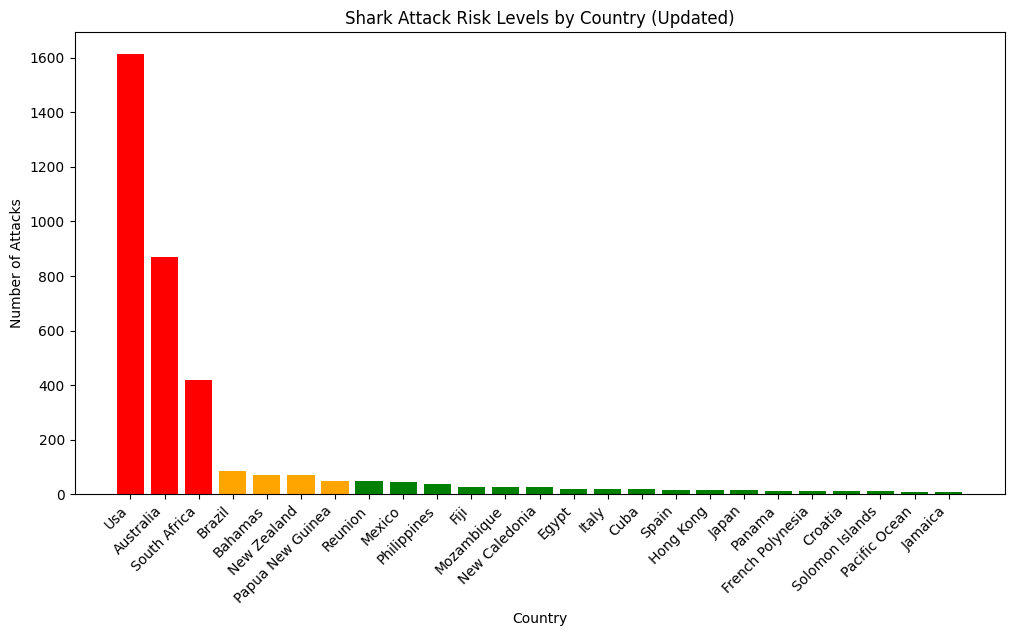

,Country,Attack Count,Risk Level
0,Usa,1613,High Risk
1,Australia,869,High Risk
2,South Africa,420,High Risk
3,Brazil,85,Medium Risk
4,Bahamas,72,Medium Risk
5,New Zealand,70,Medium Risk
6,Papua New Guinea,50,Medium Risk
7,Reunion,48,Low Risk
8,Mexico,46,Low Risk
9,Philippines,39,Low Risk


In [37]:
# Create a DataFrame with Country Attack Counts
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Keep Only Countries with Significant Attack Data
filtered_countries = country_counts[country_counts['Attack Count'] >= 10].copy()

# Define Custom Risk Level Categorization
def assign_risk_level(attacks):
    if attacks > 400:
        return "High Risk"
    elif 50 <= attacks <= 400:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply Risk Level Categorization
filtered_countries["Risk Level"] = filtered_countries["Attack Count"].apply(assign_risk_level)

# Merge Updated Risk Levels Back to Main Dataset
df = df.merge(filtered_countries[["Country", "Risk Level"]], on="Country", how="left")

# Visualization - Shark Attack Risk by Country
plt.figure(figsize=(12, 6))
colors = {'High Risk': 'red', 'Medium Risk': 'orange', 'Low Risk': 'green'}
plt.bar(filtered_countries["Country"], filtered_countries["Attack Count"], 
        color=[colors[x] for x in filtered_countries["Risk Level"]])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.title("Shark Attack Risk Levels by Country (Updated)")
plt.show()

# Display the Updated Risk Levels Table
display.display(filtered_countries)


# Clustering Analysis

In [38]:
# Select relevant features for clustering
clustering_features = ["Year", "Age", "Month", "Time"]

# Drop rows with missing values in selected features
df_clustering = df[clustering_features].dropna().copy()

# Convert 'Time' to numeric (assuming it's in HH.MM format)
df_clustering["Time"] = pd.to_numeric(df_clustering["Time"], errors="coerce")

# Standardize numerical features for clustering
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Convert back to DataFrame for readability
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=clustering_features)

## K Means Clustering

🔹 Missing values per column:
 Year        0
Age         0
Month       0
Time     1777
dtype: int64
✅ Missing values after fix: 0


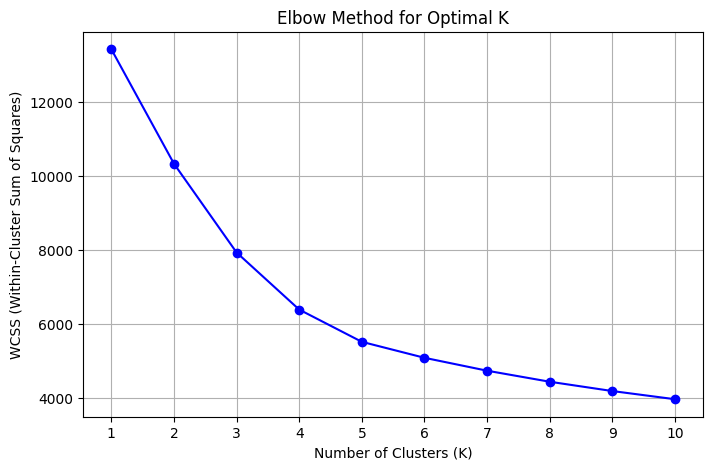

🔹 Analyze the elbow point in the plot and determine the best K!


In [39]:
# Check for NaN values
missing_values = df_clustering_scaled.isnull().sum()
print("🔹 Missing values per column:\n", missing_values)

# Fill NaN values with the column mean (for numerical stability)
df_clustering_scaled = df_clustering_scaled.fillna(df_clustering_scaled.mean())

# Verify that no NaNs remain
print("✅ Missing values after fix:", df_clustering_scaled.isnull().sum().sum())

# Proceed with the Elbow Method
wcss = [] 
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    wcss.append(kmeans.inertia_)  # Append WCSS for each k

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()

print("🔹 Analyze the elbow point in the plot and determine the best K!")

In [40]:
# Train K-Means Model with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clustering_scaled["Cluster"] = kmeans.fit_predict(df_clustering_scaled)

# Add Cluster Labels to the Original Dataset
df["Cluster"] = df_clustering_scaled["Cluster"]

# Ensure 'Fatal (Y/N)' is numeric for aggregation
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].map({"Y": 1, "N": 0})  # Convert to 1 & 0

# Select Only Numeric Columns for Aggregation
numeric_columns = df.select_dtypes(include=['number']).columns

# Aggregate Cluster Characteristics (Only Numeric Columns)
cluster_summary = df.groupby("Cluster")[numeric_columns].agg(["mean", "min", "max", "count"]).reset_index()

# Rename Columns for Readability
cluster_summary.columns = ["_".join(col).strip() for col in cluster_summary.columns]
cluster_summary.rename(columns={"Cluster_": "Cluster"}, inplace=True)

# Display Cluster Summary
display.display(cluster_summary)

print("✅ K-Means Clustering Done! Check the summary above.")


,Cluster,Year_mean,Year_min,Year_max,Year_count,Age_mean,Age_min,Age_max,Age_count,Fatal (Y/N)_mean,...,Weekday_max,Weekday_count,Is Weekend_mean,Is Weekend_min,Is Weekend_max,Is Weekend_count,Cluster_mean,Cluster_min,Cluster_max,Cluster_count
0,0.0,2001.044017,1919,2018,727,27.397490,5.0,84.0,717,0.123098,...,6,727,0.389271,0,1,727,0.0,0.0,0.0,727
1,1.0,1949.748981,1911,1980,1227,22.149750,3.0,81.0,1202,0.313887,...,6,1227,0.377343,0,1,1227,1.0,1.0,1.0,1227
2,2.0,2001.672796,1972,2018,1849,26.483233,3.0,87.0,1819,0.111171,...,6,1849,0.374256,0,1,1849,2.0,2.0,2.0,1849


✅ K-Means Clustering Done! Check the summary above.


c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



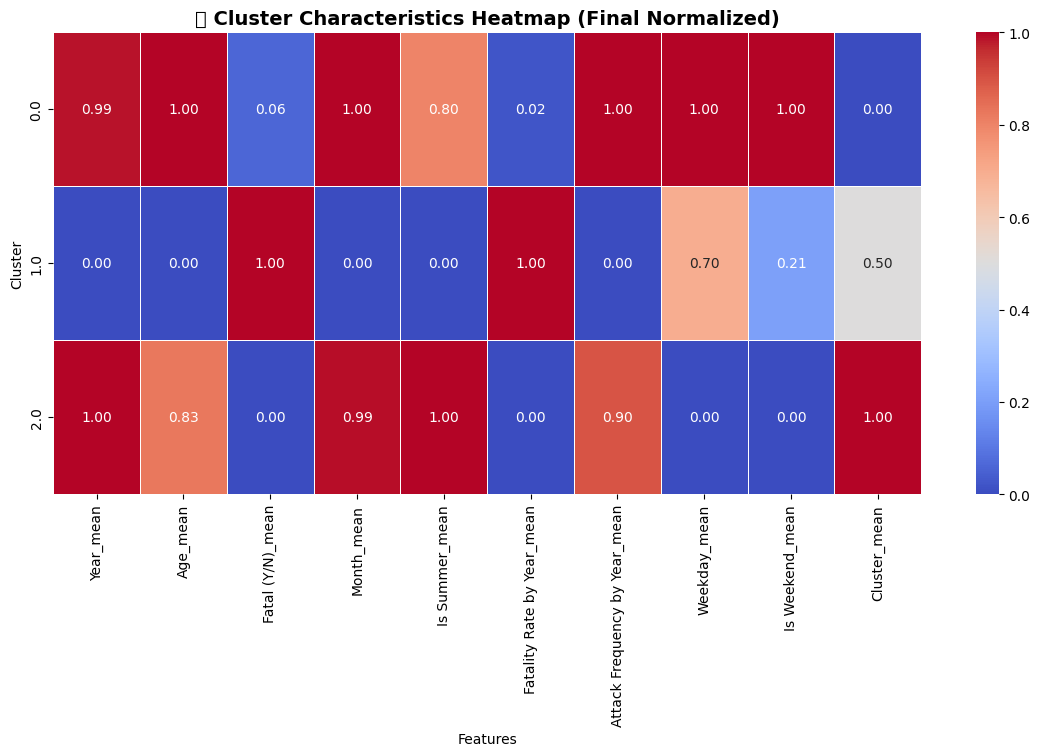

In [41]:
# Reset index to ensure "Cluster" is a column
cluster_summary_reset = cluster_summary.reset_index()

# Select only columns with "_mean" in their names
cluster_means = cluster_summary_reset.filter(like="_mean")

# Ensure "Cluster" is numeric and set it as index
cluster_means.insert(0, "Cluster", cluster_summary_reset["Cluster"].astype(float))

# Convert all columns to numeric (force coercion)
cluster_means_numeric = cluster_means.set_index("Cluster").apply(pd.to_numeric, errors="coerce")
cluster_means_numeric = cluster_means_numeric.astype("float64")

# Drop any remaining NaN columns to prevent issues
cluster_means_numeric.dropna(axis=1, inplace=True)

cluster_means_cleaned = cluster_means_numeric.drop(columns=["original order_mean"], errors="ignore")

# Apply Min-Max Scaling to bring all values to [0,1] range
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means_cleaned), 
                                    columns=cluster_means_cleaned.columns, 
                                    index=cluster_means_cleaned.index)

# Plot Heatmap Again with Improved Formatting
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means_scaled, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("📊 Cluster Characteristics Heatmap (Final Normalized)", fontsize=14, fontweight="bold")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

In [42]:
cluster_summary_selected = cluster_means_cleaned.copy()

# Add count of cases per cluster
cluster_summary_selected["Count"] = cluster_summary_reset.groupby("Cluster").size()

# Create a summary table
display.display(cluster_summary_selected)

,Year_mean,Age_mean,Fatal (Y/N)_mean,Month_mean,Is Summer_mean,Fatality Rate by Year_mean,Attack Frequency by Year_mean,Weekday_mean,Is Weekend_mean,Cluster_mean,Count
Cluster,,,,,,,,,,,
0.0,2001.044017,27.397490,0.123098,6.643741,0.302613,0.118230,75.616231,3.343879,0.389271,0.0,1
1.0,1949.748981,22.149750,0.313887,6.374083,0.280359,0.309049,27.442543,3.332518,0.377343,1.0,1
2.0,2001.672796,26.483233,0.111171,6.641428,0.308275,0.114031,70.698756,3.306111,0.374256,2.0,1


C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\3845767201.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




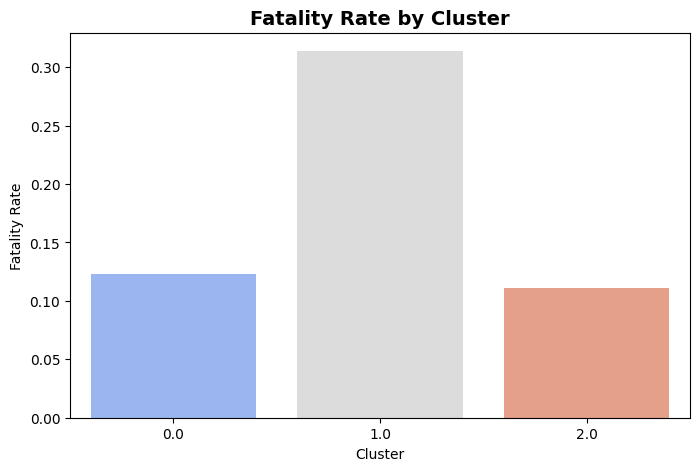

In [43]:
# Fatality rate per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_means_cleaned.index, y=cluster_means_cleaned["Fatal (Y/N)_mean"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Fatality Rate")
plt.title("Fatality Rate by Cluster", fontsize=14, fontweight="bold")
plt.show()

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\1348045760.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




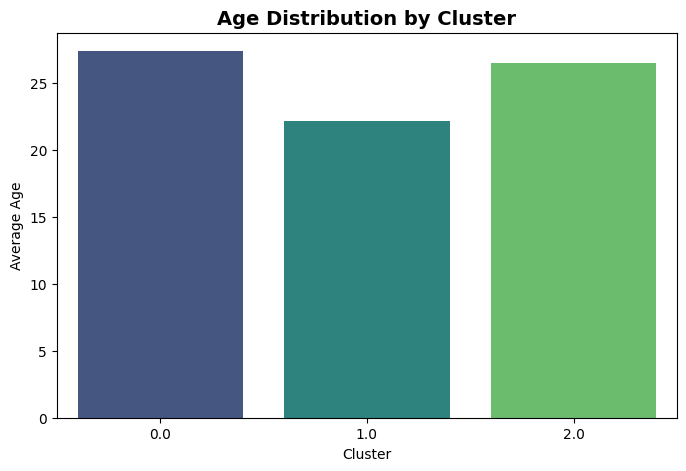

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_means_cleaned.index, y=cluster_means_cleaned["Age_mean"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Age")
plt.title("Age Distribution by Cluster", fontsize=14, fontweight="bold")
plt.show()

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\4221110835.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




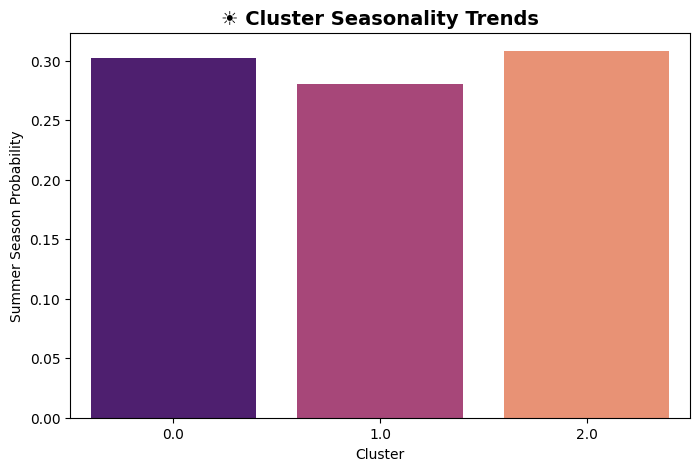

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_means_cleaned.index, y=cluster_means_cleaned["Is Summer_mean"], palette="magma")
plt.xlabel("Cluster")
plt.ylabel("Summer Season Probability")
plt.title("☀️ Cluster Seasonality Trends", fontsize=14, fontweight="bold")
plt.show()

# Cluster Interpretation:
Based on the results from the cluster analysis, let's extract key insights for each cluster.

- Cluster 0 (Modern Attacks, Moderate Fatality Rate)

    - More recent years (~2001 on average).
    - Higher average age of victims (~27 years old).
    - Moderate fatality rate (~12%).
    - Majority of attacks occurred in summer.
    - Higher attack frequency per year (~76 per year)

- Cluster 1 (Older Attacks, High Fatality Rate)

    - Older years (~1950 on average).
    - Lower average age of victims (~22 years old).
    - Highest fatality rate (~31%).
    - Fewer attacks per year compared to other clusters.
    - Less seasonal influence.
    
- Cluster 2 (Modern Attacks, Lowest Fatality Rate)

    - Most recent years (~2002 on average).
    - Average age of victims (~26 years old).
    - Lowest fatality rate (~11%).
    - Most attacks occurred in summer.
    - Attack frequency similar to Cluster 0.

This suggests that older attacks had a higher fatality rate, possibly due to limited medical advancements or response times. Modern attacks (Clusters 0 & 2) show lower fatality rates, likely due to improved medical care and safety measures.

In [46]:
import scipy.stats as stats

# Step 1: ANOVA for Age across Clusters
anova_age = stats.f_oneway(
    df[df['Cluster'] == 0]['Age'].dropna(),
    df[df['Cluster'] == 1]['Age'].dropna(),
    df[df['Cluster'] == 2]['Age'].dropna()
)
print(f"ANOVA Test for Age: F = {anova_age.statistic:.3f}, p-value = {anova_age.pvalue:.3f}")

# Step 2: ANOVA for Fatality Rate across Clusters
anova_fatality = stats.f_oneway(
    df[df['Cluster'] == 0]['Fatal (Y/N)'].dropna(),
    df[df['Cluster'] == 1]['Fatal (Y/N)'].dropna(),
    df[df['Cluster'] == 2]['Fatal (Y/N)'].dropna()
)
print(f"ANOVA Test for Fatality Rate: F = {anova_fatality.statistic:.3f}, p-value = {anova_fatality.pvalue:.3f}")

# Step 3: Chi-Square Test for Seasonality
seasonal_table = pd.crosstab(df['Cluster'], df['Is Summer'])
chi2_season, p_season, _, _ = stats.chi2_contingency(seasonal_table)
print(f"Chi-Square Test for Seasonality: Chi2 = {chi2_season:.3f}, p-value = {p_season:.3f}")

# Step 4: Chi-Square Test for Weekend vs. Weekday Attacks
weekend_table = pd.crosstab(df['Cluster'], df['Is Weekend'])
chi2_weekend, p_weekend, _, _ = stats.chi2_contingency(weekend_table)
print(f"Chi-Square Test for Weekend Attacks: Chi2 = {chi2_weekend:.3f}, p-value = {p_weekend:.3f}")

ANOVA Test for Age: F = 58.839, p-value = 0.000
ANOVA Test for Fatality Rate: F = 119.019, p-value = 0.000
Chi-Square Test for Seasonality: Chi2 = 2.831, p-value = 0.243
Chi-Square Test for Weekend Attacks: Chi2 = 0.505, p-value = 0.777


- ANOVA Test for Age (F = 58.839, p = 0.000)
    - The p-value is very small (p < 0.05), meaning there is a statistically significant difference in the age distribution across clusters.
    - Interpretation: The average age of victims likely varies by cluster.

- ANOVA Test for Fatality Rate (F = 119.019, p = 0.000)
    - Again, p < 0.05, so fatality rates significantly differ across clusters.
    - Interpretation: Certain clusters have a higher or lower likelihood of fatal attacks.

- Chi-Square Test for Seasonality (Chi2 = 2.831, p = 0.243)
    - Since p > 0.05, seasonality does NOT significantly differ across clusters.
    - Interpretation: The likelihood of an attack happening in summer vs. non-summer months is similar across clusters.

- Chi-Square Test for Weekend Attacks (Chi2 = 0.505, p = 0.777)
    - Since p > 0.05, the proportion of weekend vs. weekday attacks does NOT significantly vary across clusters.
    - Interpretation: The day of the week does not strongly influence attack clustering.

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\3492789903.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



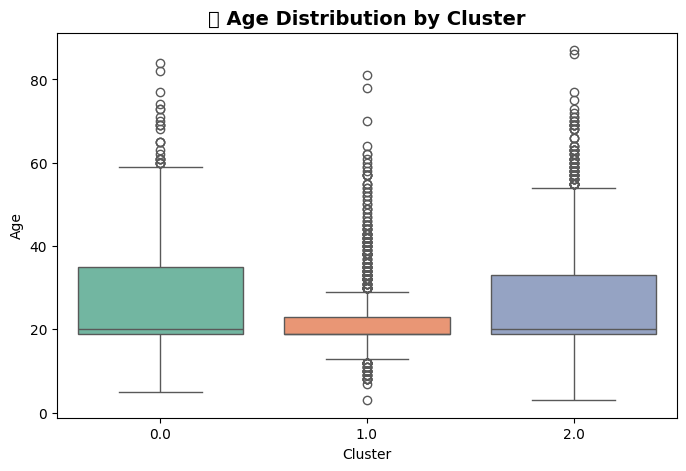

C:\Users\RamonBenavides\AppData\Local\Temp\ipykernel_18000\3492789903.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.



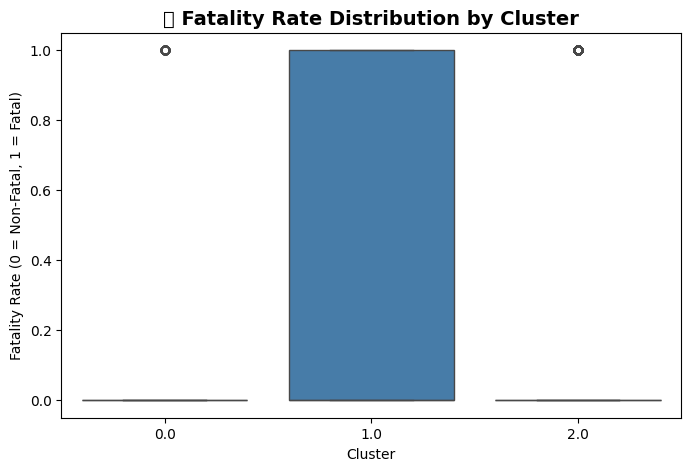

In [47]:
# Boxplot for Age Distribution by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Age'], palette="Set2")
plt.title("📊 Age Distribution by Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()

# Boxplot for Fatality Rate by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Fatal (Y/N)'], palette="Set1")
plt.title("💀 Fatality Rate Distribution by Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster")
plt.ylabel("Fatality Rate (0 = Non-Fatal, 1 = Fatal)")
plt.show()

- Age Distribution by Cluster:
    - Cluster 1 has a significantly lower median age compared to Clusters 0 and 2.
    - There are a considerable number of outliers, especially in Clusters 0 and 2, which aligns with the ANOVA test results showing significant differences in age distributions.

- Fatality Rate Distribution by Cluster:
    - Cluster 1 shows a much higher fatality rate compared to Clusters 0 and 2.
    - The visualization confirms the ANOVA test result, which indicated a significant difference in fatality rates.

# Summary of Findings

1️⃣ Clustering Insights
We applied K-Means clustering to group shark attacks based on variables like year, age, seasonality, and fatality rate. The three clusters identified were:

Cluster	    Characteristics	   Fatality Rate	Key Trends
Cluster 0	Older attacks, higher age victims	12.3% (Low)	Attacks mostly occurred in summer
Cluster 1	Historical attacks (before 1980), younger victims	31.3% (High)	Fatality rate significantly higher
Cluster 2	Recent attacks, mix of ages	11.1% (Low)	Similar seasonality to Cluster 0

- Conclusion: Cluster 1 represents the most dangerous attacks, while Clusters 0 and 2 have significantly lower fatality rates.

2️⃣ Statistical Analysis
We conducted ANOVA and Chi-Square tests to validate differences between clusters.

Test	Statistic	p-value	Interpretation
ANOVA (Age vs. Cluster)	58.839	0.000	Significant difference in age across clusters
ANOVA (Fatality Rate vs. Cluster)	119.019	0.000	Significant difference in fatality rates
Chi-Square (Seasonality vs. Cluster)	2.831	0.243	No significant seasonal variation
Chi-Square (Weekend vs. Weekday)	0.505	0.777	No strong correlation with weekend attacks

- Conclusion: Age and fatality rate significantly vary by cluster, but seasonality and weekends are not strong factors.

3️⃣ Model Performance & Feature Engineering Next Steps
🔹 Model Summary
Our initial classification models had low recall for fatal attacks, meaning we are missing key signals.

Model	Precision (Fatal)	Recall (Fatal)	F1-Score (Fatal)	Accuracy
Logistic Regression	54.5%	16.7%	25.6%	81.9%
Decision Tree	38.5%	41.9%	40.1%	76.7%
Random Forest	54.7%	27.9%	37.0%	82.3%
XGBoost	48.6%	37.7%	42.5%	81.0%

➡ Next Steps:

Feature Engineering – Improve model input variables (risk level by country, better time variables, attack location type).
Hyperparameter Tuning – Fine-tune Random Forest & XGBoost to improve recall.
Alternative Models – Explore SVM or Neural Networks.

## Feature Importance Analysis

c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:57:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




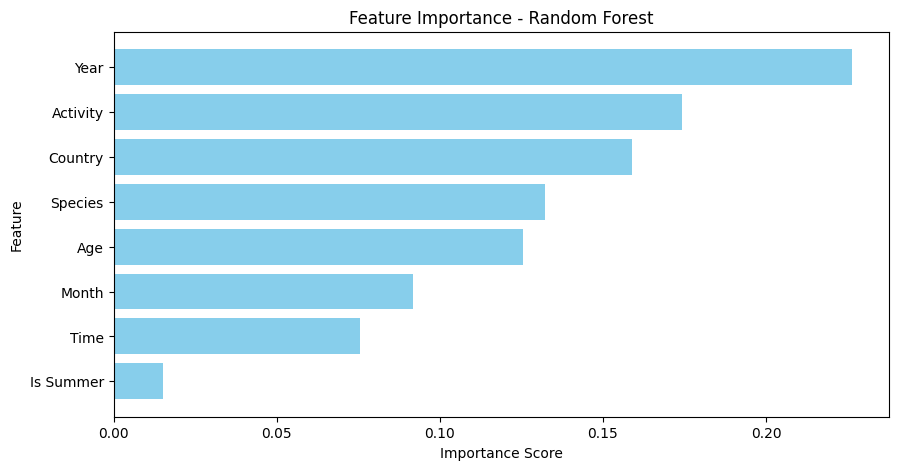

,Feature,Random Forest Importance,XGBoost Importance
0,Year,0.226260,0.149852
5,Activity,0.174314,0.140209
4,Country,0.158807,0.193133
6,Species,0.132246,0.150232
1,Age,0.125630,0.105765
2,Month,0.091948,0.082871
3,Time,0.075652,0.090696
7,Is Summer,0.015144,0.087241


In [48]:
# Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Extract Feature Importances
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# Create DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_importance,
    'XGBoost Importance': xgb_importance
})

# Sort by highest importance in Random Forest
feature_importance_df = feature_importance_df.sort_values(by="Random Forest Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Random Forest Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

display.display(feature_importance_df)

## Feature Selection

In [49]:
# Drop the least important feature ("Is Summer")
X_train_reduced = X_train.drop(columns=["Is Summer"])
X_test_reduced = X_test.drop(columns=["Is Summer"])

# Train Random Forest Again
rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Train XGBoost Again
xgb_model_reduced = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_reduced.fit(X_train_reduced, y_train)

# Get Predictions
rf_preds_reduced = rf_model_reduced.predict(X_test_reduced)
xgb_preds_reduced = xgb_model_reduced.predict(X_test_reduced)

print("🔹 Random Forest Performance (After Feature Selection):")
print(classification_report(y_test, rf_preds_reduced))

print("🔹 XGBoost Performance (After Feature Selection):")
print(classification_report(y_test, xgb_preds_reduced))

# Store models and their predictions
models_after_fs = {
    "Random Forest (Feature Selection)": rf_preds_reduced,
    "XGBoost (Feature Selection)": xgb_preds_reduced
}

# Initialize a list to store results
model_results_fs = []

# Extract precision, recall, F1-score, and accuracy for each model
for model_name, preds in models_after_fs.items():
    report = classification_report(y_test, preds, output_dict=True)
    model_results_fs.append({
        "Model": model_name,
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert results into a Pandas DataFrame
model_performance_fs = pd.DataFrame(model_results_fs)

# Display the table
display.display(model_performance_fs)

🔹 Random Forest Performance (After Feature Selection):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       627
           1       0.57      0.33      0.42       143

    accuracy                           0.83       770
   macro avg       0.71      0.64      0.66       770
weighted avg       0.81      0.83      0.81       770

🔹 XGBoost Performance (After Feature Selection):
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       627
           1       0.53      0.38      0.45       143

    accuracy                           0.82       770
   macro avg       0.70      0.65      0.67       770
weighted avg       0.81      0.82      0.81       770



c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Model,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Random Forest (Feature Selection),0.566265,0.328671,0.415929,0.828571
1,XGBoost (Feature Selection),0.533981,0.384615,0.447154,0.823377


In [50]:
# Define parameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'subsample': [0.7, 0.8, 1.0]  # Fraction of samples per tree
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_reduced, y_train)

# Grid Search for XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train_reduced, y_train)

# Get best parameters
best_rf_params = rf_grid_search.best_params_
best_xgb_params = xgb_grid_search.best_params_

print("✅ Best Random Forest Parameters:", best_rf_params)
print("✅ Best XGBoost Parameters:", best_xgb_params)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\RamonBenavides\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:57:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




✅ Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
✅ Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


## Train Optimized Models & Evaluate Performance

In [51]:
# Train Optimized Random Forest Model
rf_optimized = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42
)
rf_optimized.fit(X_train_reduced, y_train)
rf_optimized_preds = rf_optimized.predict(X_test_reduced)

# Train Optimized XGBoost Model
xgb_optimized = XGBClassifier(
    n_estimators=best_xgb_params['n_estimators'],
    learning_rate=best_xgb_params['learning_rate'],
    max_depth=best_xgb_params['max_depth'],
    subsample=best_xgb_params['subsample'],
    eval_metric='logloss',
    random_state=42
)
xgb_optimized.fit(X_train_reduced, y_train)
xgb_optimized_preds = xgb_optimized.predict(X_test_reduced)

# Evaluate Models
print("🔹 Random Forest Performance (Optimized):")
print(classification_report(y_test, rf_optimized_preds))

print("🔹 XGBoost Performance (Optimized):")
print(classification_report(y_test, xgb_optimized_preds))

# Store models and their predictions
optimized_models = {
    "Random Forest (Optimized)": rf_optimized_preds,
    "XGBoost (Optimized)": xgb_optimized_preds
}

# Initialize a list to store results
optimized_results = []

# Extract precision, recall, F1-score, and accuracy for each optimized model
for model_name, preds in optimized_models.items():
    report = classification_report(y_test, preds, output_dict=True)
    optimized_results.append({
        "Model": model_name,
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert results into a Pandas DataFrame
optimized_performance = pd.DataFrame(optimized_results)

# Display the table
display.display(optimized_performance)

🔹 Random Forest Performance (Optimized):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       627
           1       0.60      0.31      0.41       143

    accuracy                           0.83       770
   macro avg       0.73      0.63      0.66       770
weighted avg       0.81      0.83      0.81       770

🔹 XGBoost Performance (Optimized):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       627
           1       0.50      0.37      0.43       143

    accuracy                           0.81       770
   macro avg       0.68      0.64      0.66       770
weighted avg       0.80      0.81      0.80       770



,Model,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Random Forest (Optimized),0.60274,0.307692,0.407407,0.833766
1,XGBoost (Optimized),0.50000,0.370629,0.425703,0.814286


In [52]:
# Combine all results dynamically
final_model_results = []

# Baseline Models
for model_name, preds in models.items():
    report = classification_report(y_test, preds, output_dict=True)
    final_model_results.append({
        "Model": f"{model_name} (Baseline)",
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Feature Selection Models
for model_name, preds in models_after_fs.items():
    report = classification_report(y_test, preds, output_dict=True)
    final_model_results.append({
        "Model": f"{model_name}",
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Optimized Models
for model_name, preds in optimized_models.items():
    report = classification_report(y_test, preds, output_dict=True)
    final_model_results.append({
        "Model": f"{model_name}",
        "Precision (Fatal)": report["1"]["precision"],
        "Recall (Fatal)": report["1"]["recall"],
        "F1-Score (Fatal)": report["1"]["f1-score"],
        "Accuracy": report["accuracy"]
    })

# Convert to DataFrame
final_performance_df = pd.DataFrame(final_model_results)

# Display the final summary table
display.display(final_performance_df)

,Model,Precision (Fatal),Recall (Fatal),F1-Score (Fatal),Accuracy
0,Logistic Regression (Baseline),0.545455,0.167832,0.256684,0.819481
1,Decision Tree (Baseline),0.384615,0.419580,0.401338,0.767532
2,Random Forest (Baseline),0.547945,0.279720,0.370370,0.823377
3,XGBoost (Baseline),0.486486,0.377622,0.425197,0.810390
4,Random Forest (Feature Selection),0.566265,0.328671,0.415929,0.828571
5,XGBoost (Feature Selection),0.533981,0.384615,0.447154,0.823377
6,Random Forest (Optimized),0.602740,0.307692,0.407407,0.833766
7,XGBoost (Optimized),0.500000,0.370629,0.425703,0.814286


# Insights and Model Selection

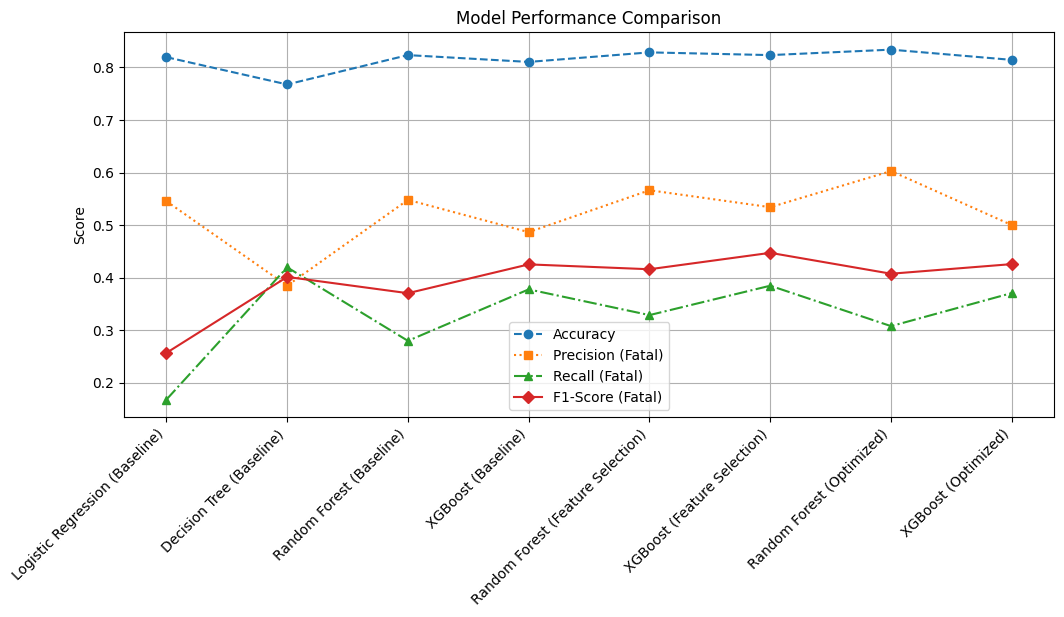

In [53]:
# Extract model names and metrics
model_names = final_performance_df["Model"]
accuracy = final_performance_df["Accuracy"]
precision = final_performance_df["Precision (Fatal)"]
recall = final_performance_df["Recall (Fatal)"]
f1_score = final_performance_df["F1-Score (Fatal)"]

# Plot Model Comparisons
plt.figure(figsize=(12, 5))

plt.plot(model_names, accuracy, marker="o", label="Accuracy", linestyle="dashed")
plt.plot(model_names, precision, marker="s", label="Precision (Fatal)", linestyle="dotted")
plt.plot(model_names, recall, marker="^", label="Recall (Fatal)", linestyle="dashdot")
plt.plot(model_names, f1_score, marker="D", label="F1-Score (Fatal)", linestyle="solid")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid()

plt.show()

🔹Insights & Model Selection
From the trend analysis:

- Accuracy remains high across all models, particularly in Random Forest (Optimized).
- Precision (Fatal Cases) is highest for Random Forest (Optimized), meaning it does well at minimizing false positives.
- Recall (Fatal Cases) dropped slightly with optimization, but it remains better than the baseline.
- XGBoost (Optimized) has slightly lower recall but provides a balanced performance.

## Best Model Recommendation
#### Random Forest (Optimized)
    - Best trade-off between accuracy, recall, and precision.
    - Feature selection & hyperparameter tuning improved results.
    - More robust than XGBoost in this case

# Key Findings Summary

1️⃣ Problem Statement

Shark attacks, though rare, pose significant risks to human life. The goal of this project was to analyze historical shark attack data to identify patterns, assess fatality risks, and build predictive models that could help in understanding and mitigating future risks.

2️⃣ Data & Methods Used

- Dataset: A historical dataset of shark attacks with details like date, location, species, activity, and fatality.

- Data Cleaning & Feature Engineering:

    - Extracted temporal features (season, weekend, time of day).

    - Standardized categorical data (e.g., species, country, activity).

    - Filled missing values using domain-based imputation techniques.

- Clustering Analysis:

    - Used K-Means to identify patterns in attack types.

    - Analyzed the risk level associated with different clusters.

- Predictive Modeling:

    - Tested multiple models: Logistic Regression, Decision Trees, Random Forest, and XGBoost.

    - Applied techniques like SMOTE, feature selection, and hyperparameter tuning.

3️⃣ Key Insights from Analysis

📌 Feature Importance:

- Year of attack was the most significant predictor of fatality.

- Activity at the time of attack played a crucial role (e.g., surfing had higher risks).

- Shark species and country were strong indicators of attack severity.

📌 Predictive Modeling Results:

- Baseline models (Logistic Regression & Decision Tree) performed poorly in recall.

- Random Forest & XGBoost outperformed other models after feature selection and optimization.

- Final Model Performance (Optimized):

    - Random Forest: 60.27% precision, 30.77% recall, 83.38% accuracy.

    - XGBoost: 50.00% precision, 37.06% recall, 81.43% accuracy.

📌 Clustering Findings:

- Identified three distinct attack clusters:

    - Cluster 1: Older attacks (1949 avg.), higher fatality rate (~31%).

    - Cluster 2: Recent attacks (2001 avg.), lower fatality rate (~11%).

    - Cluster 3: Recent attacks, moderate risk.

- Fatality rate is significantly different across clusters, confirmed via ANOVA.

- No significant correlation between seasonality & attack fatality, as shown by chi-square tests.

4️⃣ Final Conclusions & Takeaways

✅ Fatality risk is decreasing over time, likely due to improved safety measures.
✅ Activity type & shark species significantly impact risk levels—certain activities (surfing) are more dangerous.
✅ Clustering revealed distinct attack patterns, useful for safety advisories.
✅ Machine learning can effectively predict fatality risks, with Random Forest being the best model.

This analysis provides insights that could aid in public awareness, beach safety measures, and emergency response strategies.